# Data Cleaning, Feature Engineering, and Exploratory Analysis

In [1]:
### CHANGE PATH FOR YOUR COMPUTER
import sys
GITHUB_PATH = '/Users/gracewang/Documents/GitHub/elecfinal'
sys.path.insert(0, GITHUB_PATH)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from Data.data_cleaner import cleaner


In [2]:
#load in training data on each potential synapse
data = "/Users/gracewang/Documents/GitHub/elecfinal/Data/train_data.csv"
features = "/Users/gracewang/Documents/GitHub/elecfinal/Data/feature_weights.csv"
morphs = "/Users/gracewang/Documents/GitHub/elecfinal/Data/morph_embeddings.csv"

clean_data = cleaner(data, features, morphs)


Index(['adp_dist', 'post_skeletal_distance_to_soma',
       'pre_skeletal_distance_to_soma', 'pre_oracle', 'pre_test_score',
       'post_oracle', 'post_test_score', 'pre_nucleus_id', 'post_nucleus_id',
       'fw_similarity', 'nuclei_adp_dist', 'ADP_total', 'connect_total',
       'connect_rate'],
      dtype='object')
0          304.185
1          725.431
2         3423.030
3         3442.390
4         4442.380
            ...   
185827    3162.000
185828    3503.660
185829    3939.260
185830    4192.360
185831    4838.850
Name: adp_dist, Length: 185832, dtype: float64
0         353043.0
1         244156.0
2         363829.0
3         344267.0
4         313630.0
            ...   
185827     86928.2
185828    114862.0
185829    140923.0
185830    110553.0
185831    363943.0
Name: post_skeletal_distance_to_soma, Length: 185832, dtype: float64
0         1182170.0
1          914243.0
2         1171820.0
3         1192340.0
4          788566.0
            ...    
185827     936997.0
1858

In [4]:
num_cols = data.select_dtypes(include='number').columns
num_cols

Index(['ID', 'axonal_coor_x', 'axonal_coor_y', 'axonal_coor_z',
       'dendritic_coor_x', 'dendritic_coor_y', 'dendritic_coor_z', 'adp_dist',
       'post_skeletal_distance_to_soma', 'pre_skeletal_distance_to_soma',
       'pre_oracle', 'pre_test_score', 'pre_rf_x', 'pre_rf_y', 'post_oracle',
       'post_test_score', 'post_rf_x', 'post_rf_y', 'pre_nucleus_x',
       'pre_nucleus_y', 'pre_nucleus_z', 'post_nucleus_x', 'post_nucleus_y',
       'post_nucleus_z', 'pre_nucleus_id', 'post_nucleus_id'],
      dtype='object')

In [4]:
# join all distance columns into a single np.array column
def dist_column(df, new_col, old_cols):
    df[new_col] = (
        df.filter(regex=old_cols)
        .sort_index(axis=1)
        .apply(lambda x: np.array(x), axis=1)
    )
    # delete the old columns
    df.drop(
        df.filter(regex=old_cols).columns, axis=1, inplace=True
    )
    return df

In [5]:
df = dist_column(data, "axonal_coords", "axonal_coor_")
df = dist_column(df, "dendritic_coords", "dendritic_coor_")
df = dist_column(df, "pre_rf_coords", "pre_rf_")
df = dist_column(df, "post_rf_coords", "post_rf_")
df = dist_column(df, "pre_nucleus_coords", "pre_nucleus_[xyz]")
df = dist_column(df, "post_nucleus_coords", "post_nucleus_[xyz]")

## Feature Engineering: Distances

In [6]:
df["total_distance"] = df["post_skeletal_distance_to_soma"] + df["pre_skeletal_distance_to_soma"]-df["adp_dist"]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

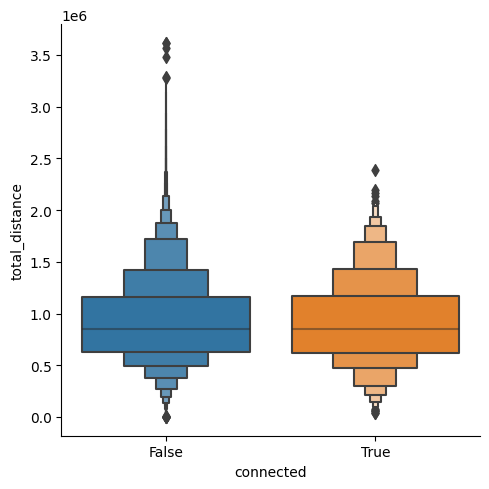

In [7]:
sns.catplot(data=df, x='connected', y='total_distance', kind='boxen')

## Distance from Pre-Synaptic Nucleus to Axon
The presynaptic neuron is the one that transmits chemical information; perhaps if the distance between the nucleus of the presynaptic neuron and its axon is sufficiently large, the neuron's electrical charge will not be strong enough to form a connection.

In [8]:
# nuclei-adp euclidean distance
df["nuclei_adp_dist"] =  df[["pre_nucleus_coords", "axonal_coords"]].apply(lambda x: math.dist(x["pre_nucleus_coords"], x["axonal_coords"]), axis=1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

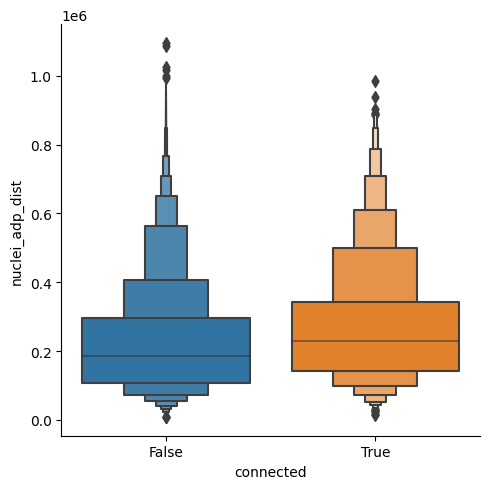

In [9]:
sns.catplot(data=df, x='connected', y='nuclei_adp_dist', kind='boxen')

## Pre-Synaptic Soma to ADP Distance
"Generally, axons form thousands of synapses that are often arranged like pearls on a string, with approximately one presynaptic specialization per 2-µm axon length" - The Cell Biology of Synapse Formation (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8186004/#:~:text=After%20neurons%20are%20born%2C%20migrate,under%20control%20of%20unknown%20signals.)
Perhaps the number of synapses formed is related to the length of the axon

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

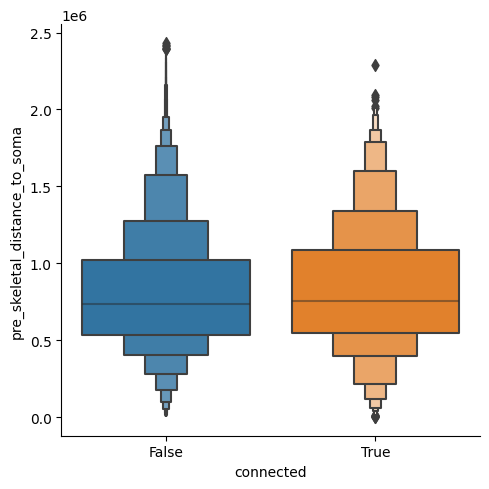

In [10]:
sns.catplot(data=df, x='connected', y='pre_skeletal_distance_to_soma', kind='boxen')

## Per-Neuron ADP Counts
How many ADPs are formed by each neuron? Maybe those with more ADPs will be more likely to have a connection.

In [11]:
counts = df.groupby('pre_nucleus_id').count() # count of each presynaptic neuron
counts = counts["ID"]
total_connections = df[["pre_nucleus_id", "connected"]].groupby('pre_nucleus_id').sum()
total_connections = total_connections["connected"]
adp_counts = pd.DataFrame([counts, total_connections]).transpose()
adp_counts = adp_counts.rename(columns={"ID":"count"})
adp_counts["connect_rate"] = adp_counts["connected"]/adp_counts["count"]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='connected'>

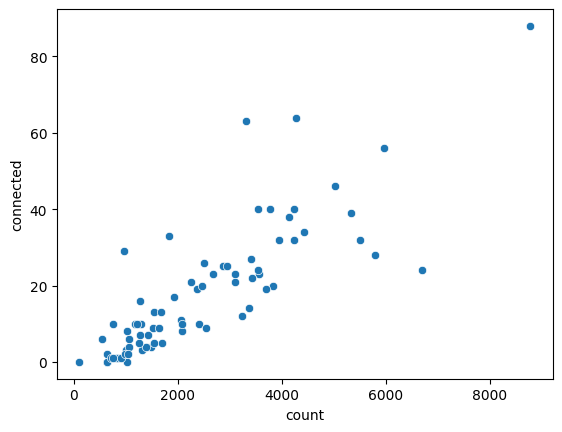

In [12]:
# scatter plot of adp count vs number connected
sns.scatterplot(data=adp_counts, x="count", y="connected")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='connect_rate', ylabel='Count'>

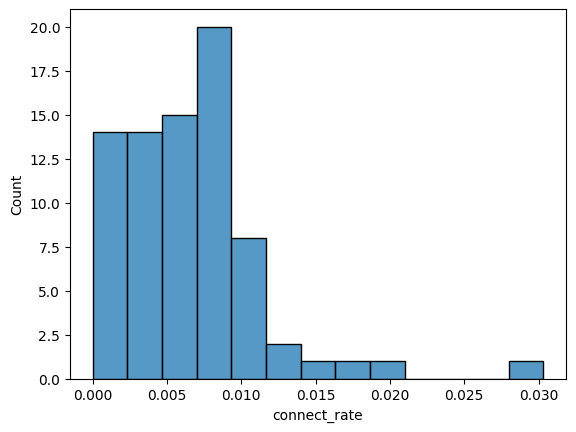

In [13]:
# bar graph of connection rate vs count
sns.histplot(data=adp_counts, x="connect_rate")

In [14]:
# which neurons have the highest connection rate? Let's look at the features of these neurons
adp_counts.sort_values(by="connect_rate", ascending=False)

count  connected  connect_rate
pre_nucleus_id                                
269247            956         29      0.030335
330079           3308         63      0.019045
330326           1834         33      0.017993
258307           4277         64      0.014964
612352            745         10      0.013423
...               ...        ...           ...
583891            629          0      0.000000
256443           1019          0      0.000000
580826            635          0      0.000000
531202            105          0      0.000000
553556            635          0      0.000000

[77 rows x 3 columns]

In [15]:
counts = df.groupby('pre_nucleus_id').count() # count of each presynaptic neuron
counts = counts["ID"]
total_connections = df[["pre_nucleus_id", "connected"]].groupby('pre_nucleus_id').sum()
total_connections = total_connections["connected"]
adp_counts = pd.DataFrame([counts, total_connections]).transpose()
adp_counts = adp_counts.rename(columns={"ID":"ADP_total", "connected":"connect_total"})
adp_counts["connect_rate"] = adp_counts["connect_total"]/adp_counts["ADP_total"]
print(adp_counts)
data = df.merge(adp_counts, left_on='pre_nucleus_id', right_on='pre_nucleus_id')
data.columns

                ADP_total  connect_total  connect_rate
pre_nucleus_id                                        
189149               4242             32      0.007544
222998               5512             32      0.005806
223037               3108             23      0.007400
224565               1534             13      0.008475
230236               2403             10      0.004161
...                   ...            ...           ...
610498               6706             24      0.003579
610535                719              1      0.001391
610615               1213             10      0.008244
612266                747              1      0.001339
612352                745             10      0.013423

[77 rows x 3 columns]


Index(['ID', 'adp_dist', 'post_skeletal_distance_to_soma',
       'pre_skeletal_distance_to_soma', 'pre_oracle', 'pre_test_score',
       'post_oracle', 'post_test_score', 'compartment', 'pre_brain_area',
       'post_brain_area', 'pre_nucleus_id', 'post_nucleus_id', 'connected',
       'pre_feature_weights', 'post_feature_weights', 'pre_morph_embeddings',
       'post_morph_embeddings', 'axonal_coords', 'dendritic_coords',
       'pre_nucleus_coords', 'post_nucleus_coords', 'total_distance',
       'nuclei_adp_dist', 'ADP_total', 'connect_total', 'connect_rate'],
      dtype='object')

## Exploration

In [37]:
# function to remove non-numeric/non-informational columns
from sklearn import preprocessing
def col_cleaner(df):
    new_df = df._get_numeric_data().drop(columns=["ID", "connected", "pre_nucleus_id", "post_nucleus_id"])

    # standardize
    scaler = preprocessing.StandardScaler().fit(new_df)
    scaled_df = scaler.transform(new_df)
    scaled_df = pd.DataFrame(scaled_df, columns=new_df.columns)
    scaled_df["connected"]=df['connected']
    return scaled_df

In [44]:
num_df = col_cleaner(df)
num_df

adp_dist  post_skeletal_distance_to_soma  \
0      -1.515697                        2.007164   
1      -1.225578                        1.070301   
2       0.632301                        2.099967   
3       0.645635                        1.931656   
4       1.334344                        1.668055   
...          ...                             ...   
185827  0.452526                       -0.282486   
185828  0.687832                       -0.042144   
185829  0.987837                        0.182085   
185830  1.162151                       -0.079219   
185831  1.607399                        2.100948   

        pre_skeletal_distance_to_soma  pre_oracle  pre_test_score  \
0                            0.931055    0.037561        0.787980   
1                            0.268030    0.037561        0.787980   
2                            0.905442    0.037561        0.787980   
3                            0.956222    0.037561        0.787980   
4                           -0.042977    0.037561        0.787980   
...                               ...         ...             ...   
185827                       0.324338    0.221486        0.550581   
185828                       0.817518    0.221486        0.550581   
185829                       0.910021    0.221486        0.550581   
185830                       0.792450    0.221486        0.550581   
185831                       0.099501    0.221486        0.550581   

        post_oracle  post_test_score  total_distance  nuclei_adp_dist  \
0          1.191761        -0.205420        1.445959         0.076496   
1          1.191761        -0.205420        0.554267        -0.306546   
2          1.191761        -0.205420        1.439617         0.118612   
3          1.191761        -0.205420        1.441836         0.035778   
4          1.191761        -0.205420        0.412631        -0.587712   
...             ...              ...             ...              ...   
185827    -0.237960        -1.077152        0.230644        -0.780397   
185828    -0.237960        -1.077152        0.766945         0.047859   
185829    -0.237960        -1.077152        0.915875         0.385538   
185830    -0.237960        -1.077152        0.731187         0.261090   
185831    -0.237960        -1.077152        0.666714        -0.442094   

        connected  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
185827      False  
185828      False  
185829      False  
185830      False  
185831      False  

[185832 rows x 10 columns]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

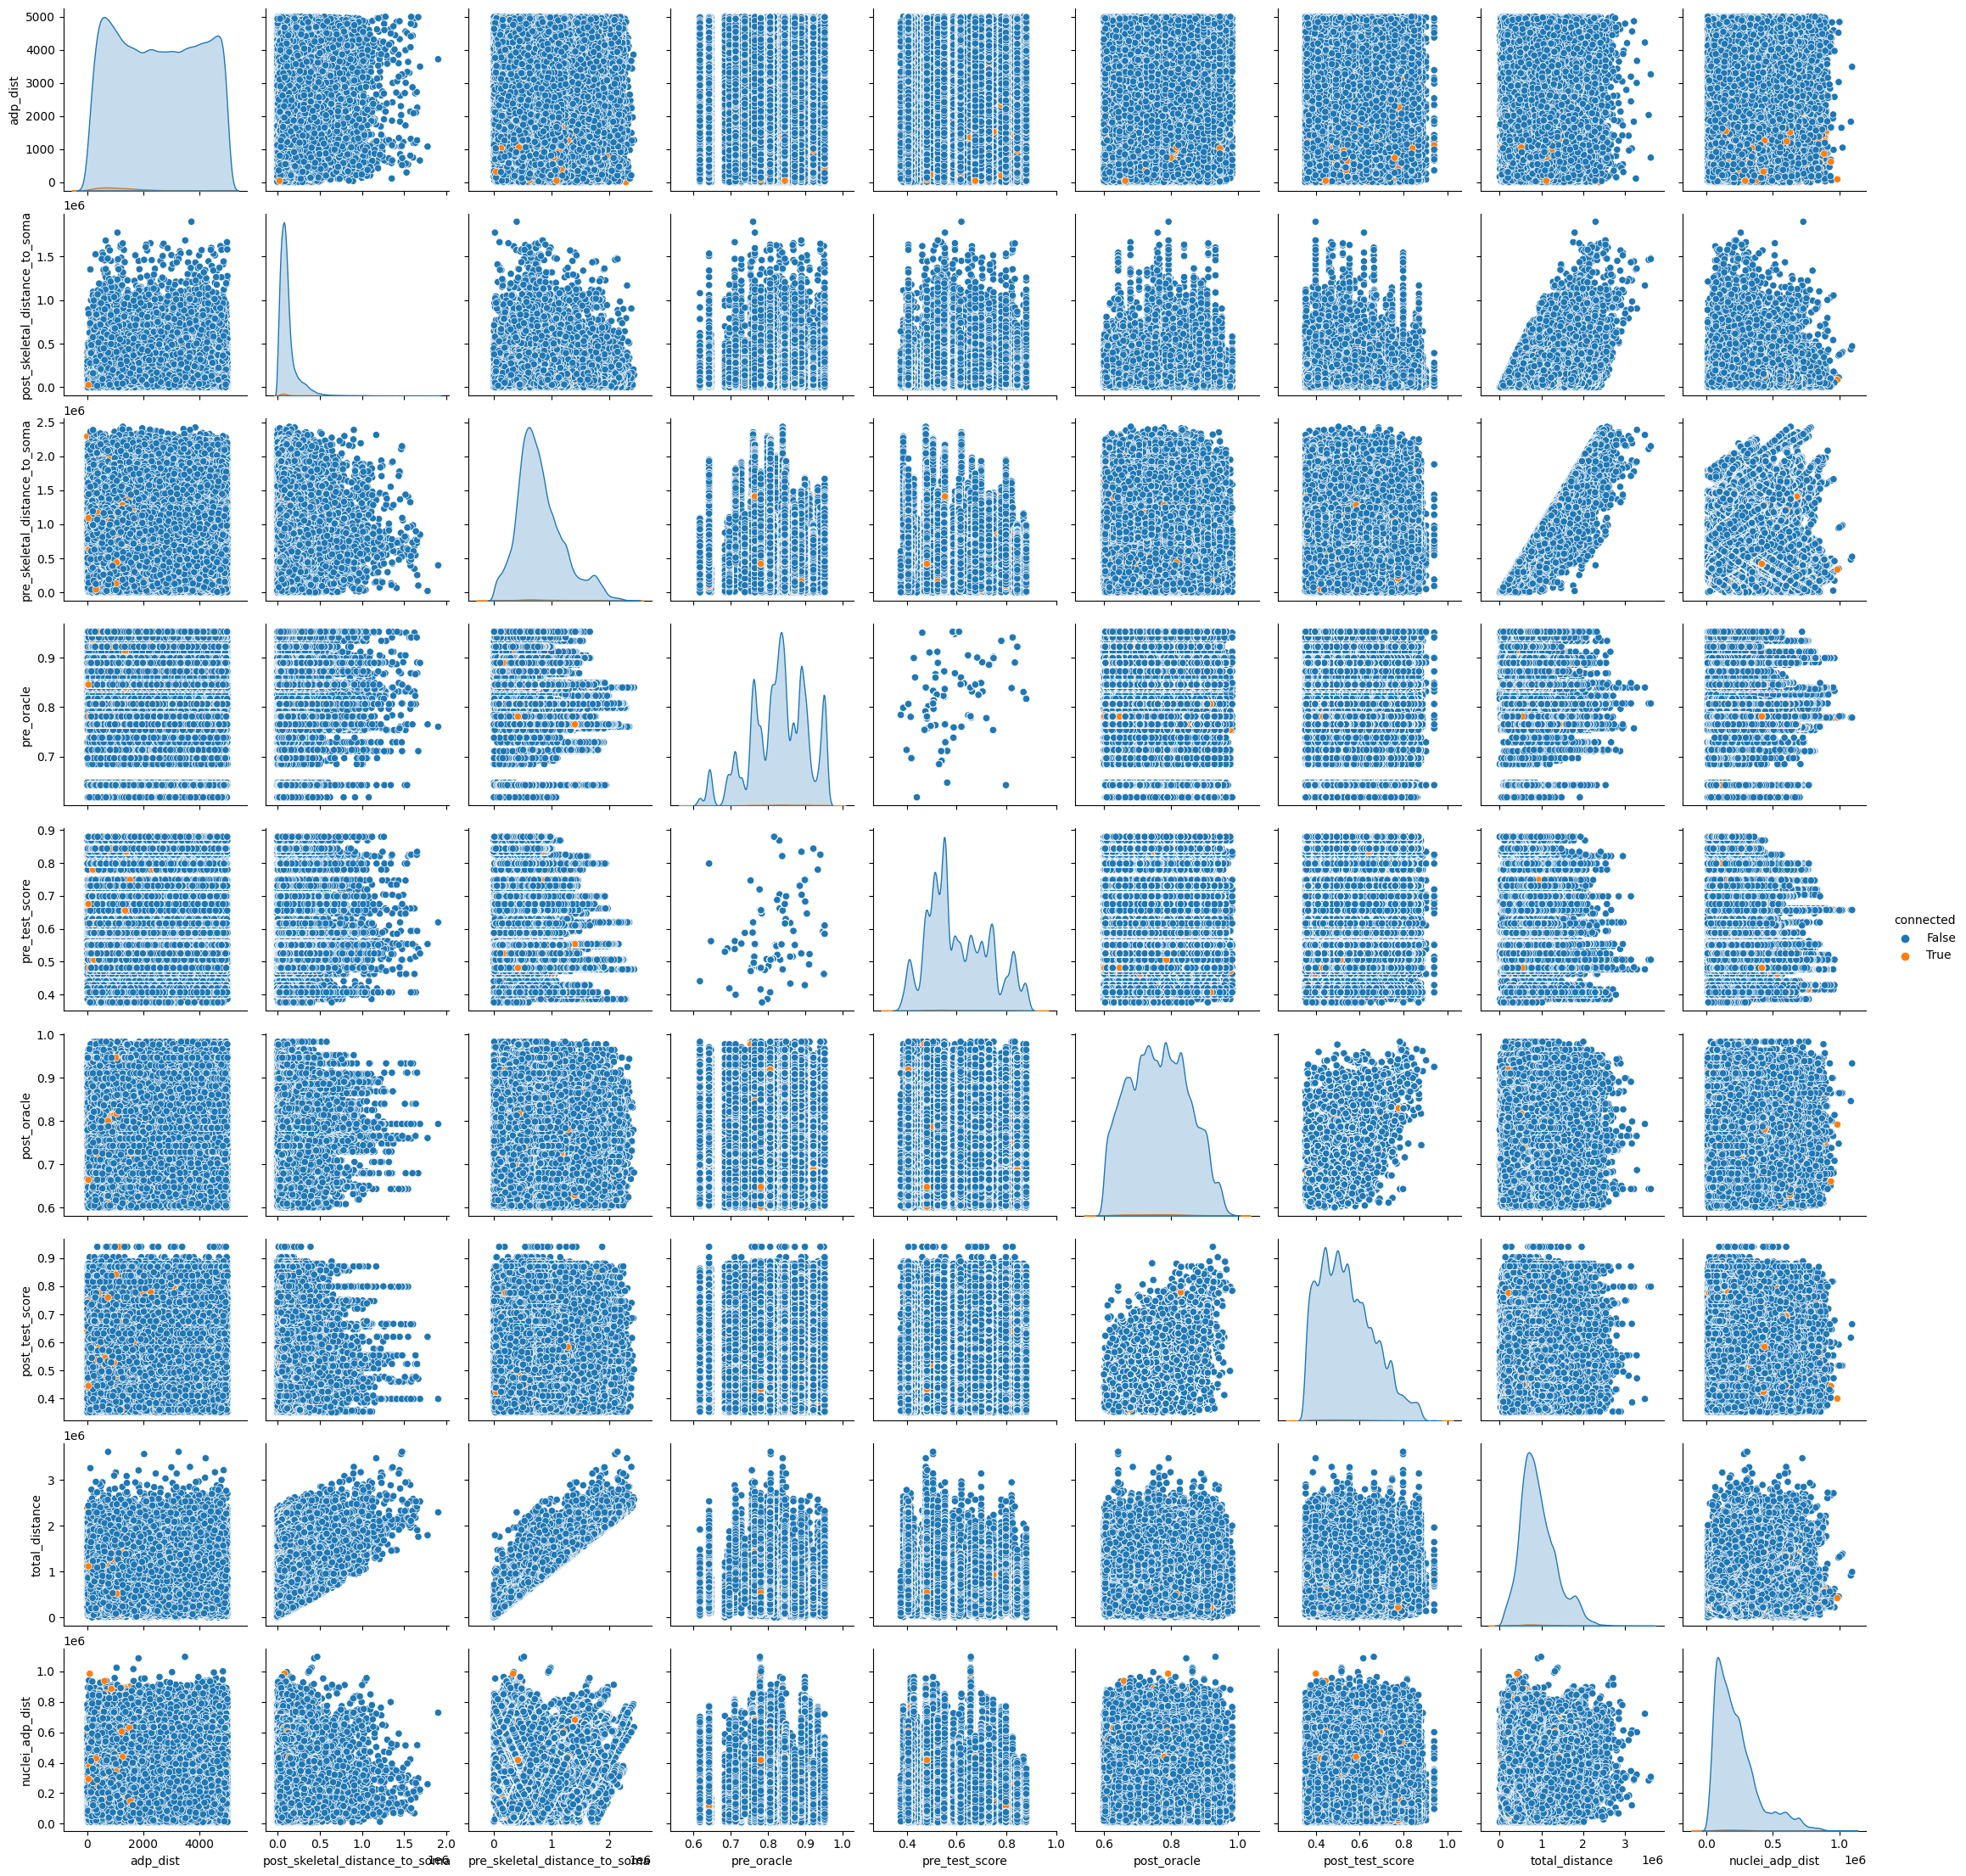

In [17]:
# pairplot for all data
sns.pairplot(num_df, hue='connected')

### Investigate Post-Skeletal Distance to Soma

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='post_skeletal_distance_to_soma'>

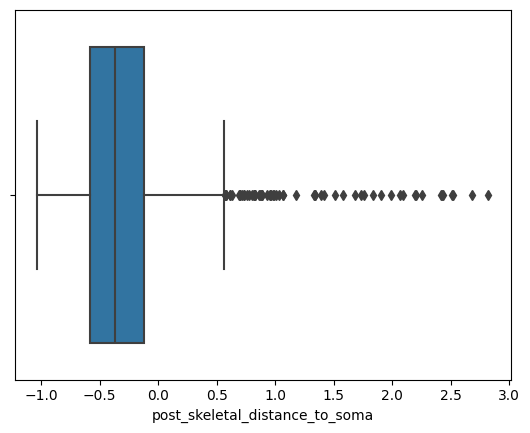

In [53]:
con = num_df[num_df["connected"]==True]
sns.boxplot(con, x='post_skeletal_distance_to_soma')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

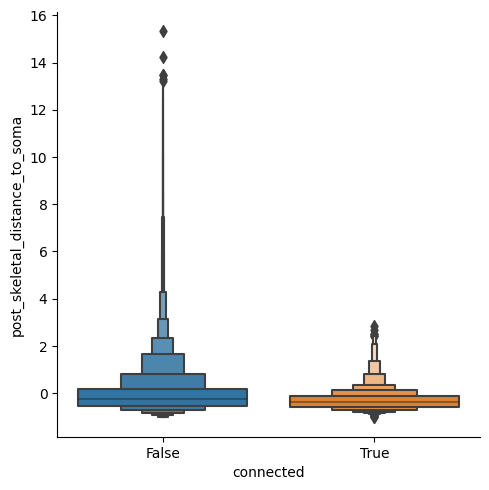

In [54]:
sns.catplot(data=num_df, x='connected', y='post_skeletal_distance_to_soma', kind='boxen')

## Investigate Pre-Oracle and Post-Oracle difference

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

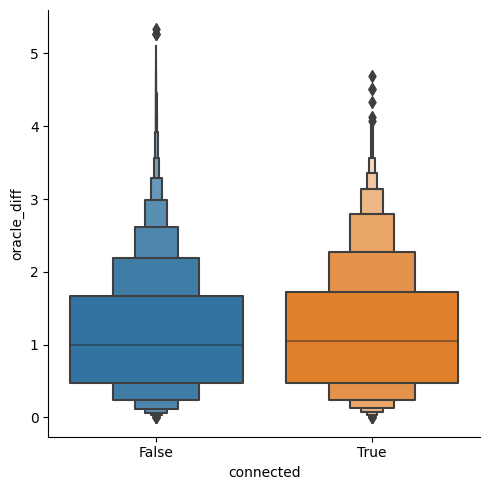

In [57]:
num_df['oracle_diff']=abs(num_df['pre_oracle']-num_df['post_oracle'])
sns.catplot(data=num_df, x='connected', y='oracle_diff', kind='boxen')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Differences in Oracle Performance for Connected Synapses')

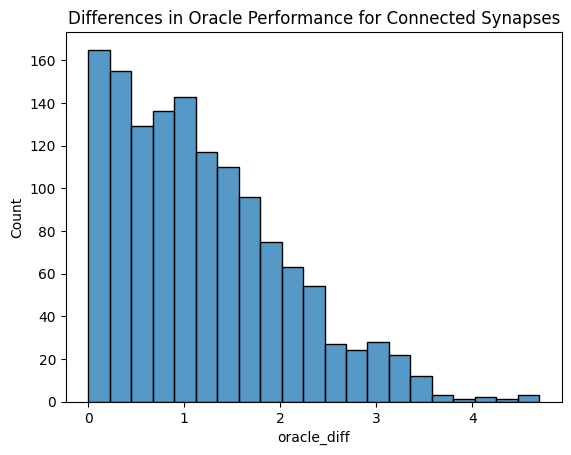

In [68]:
sns.histplot(data=num_df[num_df['connected']==True], x='oracle_diff')
plt.title('Differences in Oracle Performance for Connected Synapses')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Differences in Oracle Performance for Unconnected Synapses')

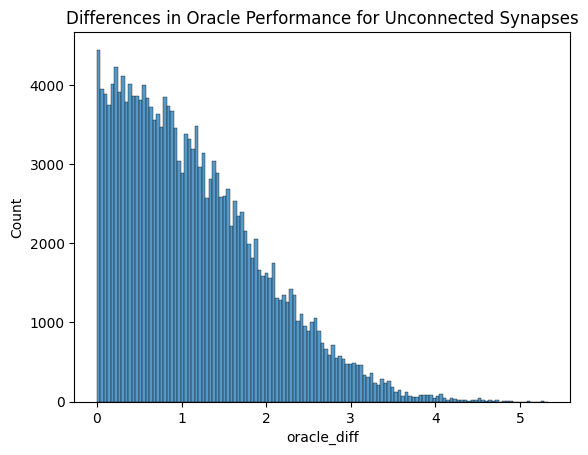

In [69]:
sns.histplot(data=num_df[num_df['connected']==False], x='oracle_diff')
plt.title('Differences in Oracle Performance for Unconnected Synapses')